<a href="https://colab.research.google.com/github/sahasraa178/Machine-Learning-sem-4/blob/main/ML%20lab%20assignment-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING LAB ASSIGNMENT 2**


**BL.SC.U4AIE24009**



**B.Sahasraa**

A1

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

#  Uploading the Excel file
uploaded = files.upload()
#loads the exel sheet
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name="Purchase data")
print("Columns in sheet:", df.columns.tolist())
print(df.head())

def load_data(filepath, sheet_name="Purchase data"):
    """
    Load data from Excel sheet and return feature matrix X and output vector y.
    """
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    X = df[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]].values
    y = df["Payment (Rs)"].values
    return X, y
# function to calculate the rank of a matrix
def calculate_rank(X):
    """
    Calculate and return the rank of the feature matrix X.
    """
    return np.linalg.matrix_rank(X)
# function to calculate pseudo inverse
def compute_pseudo_inverse(X):
    """
    Compute and return the pseudo-inverse of matrix X.
    """
    return np.linalg.pinv(X)
#function calculateing the product costs
def estimate_product_costs(X, y):
    """
    Estimate and return the cost per unit of each product using pseudo-inverse.
    """
    X_pinv = compute_pseudo_inverse(X)
    return X_pinv @ y
#main class
def main():

    filepath = "/content/Lab Session Data.xlsx"
    X, y = load_data(filepath)
    rank_X = calculate_rank(X)
    product_costs = estimate_product_costs(X, y)

    print("Rank of feature matrix X:", rank_X)

    # Creating a clean table using pandas
    cost_table = pd.DataFrame({
        "Product": ["Candies", "Mangoes", "Milk Packets"],
        "Estimated Cost (Rs)": [round(product_costs[0], 2),
                                round(product_costs[1], 2),
                                round(product_costs[2], 2)]
    })
    print("\nEstimated cost per unit:")
    print(cost_table.to_string(index=False))


    filepath = "/content/Lab Session Data.xlsx"
    X, y = load_data(filepath)

    # Calculates the rank
    rank_X = calculate_rank(X)

    #  Estimates the  product costs
    product_costs = estimate_product_costs(X, y)

    # Prints the appropriate results
    print("Rank of feature matrix X:", rank_X)
    print("Estimated cost per unit:")
    print("Candies (Rs):", round(product_costs[0], 2))
    print("Mangoes (Rs):", round(product_costs[1], 2))
    print("Milk Packets (Rs):", round(product_costs[2], 2))

main()


Saving Lab Session Data.xlsx to Lab Session Data.xlsx
Columns in sheet: ['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Candy', 'Mango', 'Milk']
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN 

**A2**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Uploading the Excel file
uploaded = files.upload()

#  Loads the exel sheet
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name="Purchase data")

# Creating RICH/POOR labels
df["Class"] = df["Payment (Rs)"].apply(lambda x: "RICH" if x > 200 else "POOR")

# Prepares the features and labels
X = df[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]]
y = df["Class"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Train classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluates thye model
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Predicts for a new customer
new_customer = pd.DataFrame([[10, 2, 3]], columns=["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"])
prediction = model.predict(new_customer)
print("\nNew customer prediction:", prediction[0])




Saving Lab Session Data.xlsx to Lab Session Data (5).xlsx
Classification Report:

              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


New customer prediction: POOR


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**A3**

Saving Lab Session Data.xlsx to Lab Session Data (6).xlsx
Columns: ['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%']
           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  

Mean (numpy): 1560.6634538152612
Variance (numpy): 58496.49239931618

Mean (custom): 1560.6634538152612
Variance (custom): 58496.492399316136

Average execution time (10 runs):
numpy mean: 4.742145538330078e-05 seconds
custom mean: 2.238750457763672e-05 seconds
numpy var: 2.8324127197265624e-05 seconds
custom var: 7.143020629882813e

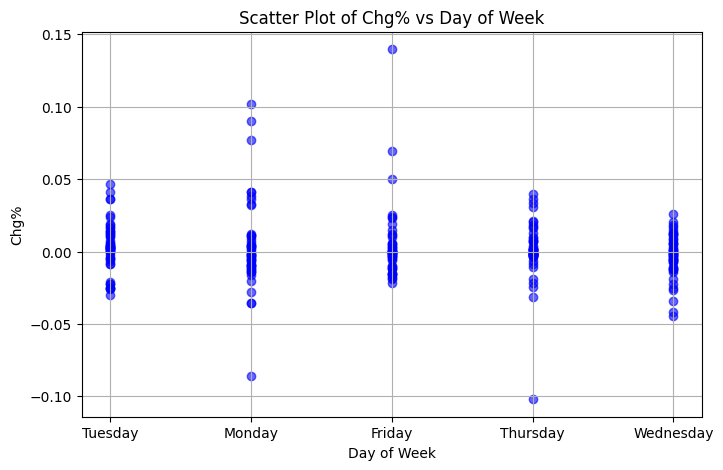

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from google.colab import files

#  Uploading the Excel file
uploaded = files.upload()

# Loads the IRCTC Stock Price sheet
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name="IRCTC Stock Price")

# Previews columns
print("Columns:", df.columns.tolist())
print(df.head())


# calculating the  Mean and Variance using numpy

price_data = df.iloc[:, 3]   # Column D (4th column, index=3)
mean_np = np.mean(price_data)
var_np = np.var(price_data)

print("\nMean (numpy):", mean_np)
print("Variance (numpy):", var_np)

# the Custom functions for mean & variance

def my_mean(data):
    return sum(data) / len(data)

def my_variance(data):
    mu = my_mean(data)
    return sum((x - mu)**2 for x in data) / len(data)

# does the Accuracy check for custom functions
mean_custom = my_mean(price_data)
var_custom = my_variance(price_data)

print("\nMean (custom):", mean_custom)
print("Variance (custom):", var_custom)


# Computational complexity comparison is done here

def time_function(func, data, runs=10):
    times = []
    for _ in range(runs):
        start = time.time()
        func(data)
        end = time.time()
        times.append(end - start)
    return np.mean(times)

time_np_mean = time_function(np.mean, price_data)
time_custom_mean = time_function(my_mean, price_data)

time_np_var = time_function(np.var, price_data)
time_custom_var = time_function(my_variance, price_data)

print("\nAverage execution time (10 runs):")
print("numpy mean:", time_np_mean, "seconds")
print("custom mean:", time_custom_mean, "seconds")
print("numpy var:", time_np_var, "seconds")
print("custom var:", time_custom_var, "seconds")


# calculates the Sample mean for Wednesdays

df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
wednesday_prices = df[df['Day'] == "Wednesday"].iloc[:, 3]
mean_wed = np.mean(wednesday_prices)

print("\nPopulation mean:", mean_np)
print("Wednesday sample mean:", mean_wed)


# calculates the Sample mean for April

df['Month'] = pd.to_datetime(df['Date']).dt.month
april_prices = df[df['Month'] == 4].iloc[:, 3]
mean_april = np.mean(april_prices)

print("\nPopulation mean:", mean_np)
print("April sample mean:", mean_april)


#calculates the Probability of making a loss (Chg% < 0)

chg_data = df.iloc[:, 8]   # Column I (Chg%)
loss_prob = (chg_data.apply(lambda x: x < 0).sum()) / len(chg_data)
print("\nProbability of loss:", loss_prob)


# calculates Probability of profit on Wednesday

profit_wed_prob = (df[(df['Day'] == "Wednesday")].iloc[:, 8].apply(lambda x: x > 0).sum()) / len(wednesday_prices)
print("Probability of profit on Wednesday:", profit_wed_prob)


# calculates the Conditional probability of profit given Wednesday

# P(profit | Wednesday) = (# Wednesdays with profit) / (# Wednesdays total)
cond_prob = profit_wed_prob
print("Conditional probability of profit given Wednesday:", cond_prob)


# calculating the Scatter plot of Chg% vs Day of Week
plt.figure(figsize=(8,5))
plt.scatter(df['Day'], chg_data, color='blue', alpha=0.6)
plt.title("Scatter Plot of Chg% vs Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Chg%")
plt.grid(True)
plt.show()


**A4**

Saving Lab Session Data.xlsx to Lab Session Data.xlsx

Column names:
['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']

Data types:
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       ob

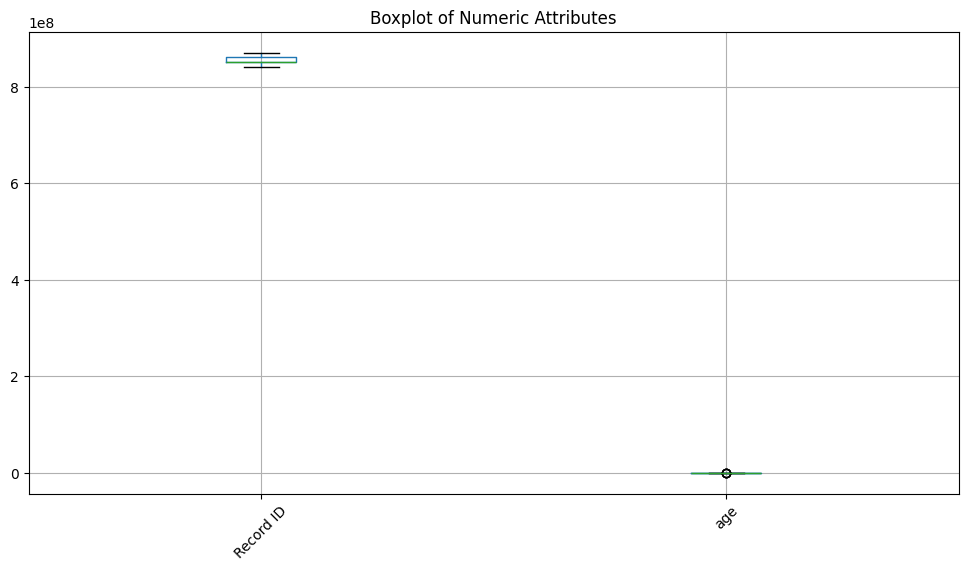


Mean and standard deviation for numeric variables:
Record ID: mean=852947346.61, std=7581968.78
age: mean=73.56, std=1183.98


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

#  Uploading the Excel file
uploaded = files.upload()

# Loading the thyroid0387_UCI sheet
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name="thyroid0387_UCI")

#  gives the Overview of attributes
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nSample values:")
print(df.head())

# Identifying categorical vs numeric datatype
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical attributes:", categorical_cols)
print("Numeric attributes:", numeric_cols)


print("\nEncoding strategy:")
for col in categorical_cols:
    unique_vals = df[col].dropna().unique()
    print(f"{col}: {len(unique_vals)} unique values → {'Label Encoding' if len(unique_vals) <= 5 else 'One-Hot Encoding'}")

#  Data range for numeric variables
print("\nData range for numeric variables:")
for col in numeric_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")

#  Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# gives the Outlier detection using boxplots
print("\nBoxplots for numeric variables:")
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numeric Attributes")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# calculates the Mean and variance
print("\nMean and standard deviation for numeric variables:")
for col in numeric_cols:
    print(f"{col}: mean={df[col].mean():.2f}, std={df[col].std():.2f}")


**A5**

In [ ]:
import pandas as pd
from google.colab import files

#  Uploading and loading the Excel file
uploaded = files.upload()
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name="thyroid0387_UCI")

# the binary conversion:- Convert 't'/'f' to 1/0
df_binary = df.copy()
df_binary.replace({'t': 1, 'f': 0}, inplace=True)

#  Identifying binary columns (now numeric 0/1)
binary_cols = [col for col in df_binary.columns if df_binary[col].dropna().isin([0, 1]).all()]

#  Extracting first two binary vectors
v1 = df_binary.loc[0, binary_cols].astype(int).values
v2 = df_binary.loc[1, binary_cols].astype(int).values

#  Computing f11, f00, f01, f10
f11 = sum((v1 == 1) & (v2 == 1))
f00 = sum((v1 == 0) & (v2 == 0))
f01 = sum((v1 == 0) & (v2 == 1))
f10 = sum((v1 == 1) & (v2 == 0))

# calculates the JC and SMC matrices
if (f11 + f01 + f10) == 0:
    jc = None
    print("Jaccard Coefficient is undefined (no positive matches in either vector).")
else:
    jc = f11 / (f11 + f01 + f10)
    print("Jaccard Coefficient (JC):", round(jc, 3))

denominator_smc = f11 + f00 + f01 + f10
if denominator_smc == 0:
    smc = None
    print("Simple Matching Coefficient is undefined (no comparable binary attributes).")
else:
    smc = (f11 + f00) / denominator_smc
    print("Simple Matching Coefficient (SMC):", round(smc, 3))

# Displaying results
print("Binary attributes used:", binary_cols)
print("f11 =", f11, "f00 =", f00, "f01 =", f01, "f10 =", f10)



Saving Lab Session Data.xlsx to Lab Session Data (7).xlsx
Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.85
Binary attributes used: ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
f11 = 1 f00 = 16 f01 = 2 f10 = 1


/tmp/ipython-input-1930619822.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_binary.replace({'t': 1, 'f': 0}, inplace=True)


**A6**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files

#  Uploading and loading the Excel file
uploaded = files.upload()
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name="thyroid0387_UCI")

#  Replacing '?' with NaN and drop columns with all missing values
df.replace('?', np.nan, inplace=True)
df.dropna(axis=1, how='all', inplace=True)

#  Encoding categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype(str)  # ensure consistent type
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Filling the remaining NaNs with column mean (for numeric) or mode (for categorical)
for col in df_encoded.columns:
    if df_encoded[col].dtype in ['float64', 'int64']:
        df_encoded[col].fillna(df_encoded[col].mean(), inplace=True)
    else:
        df_encoded[col].fillna(df_encoded[col].mode()[0], inplace=True)

# Extracts the  full feature vectors for first two observations
v1 = df_encoded.iloc[0].values.reshape(1, -1)
v2 = df_encoded.iloc[1].values.reshape(1, -1)

#  Computes cosine similarity
cos_sim = cosine_similarity(v1, v2)[0][0]
print("Cosine Similarity between first two observations:", round(cos_sim, 4))


Saving Lab Session Data.xlsx to Lab Session Data (8).xlsx
Cosine Similarity between first two observations: 1.0


/tmp/ipython-input-1511615106.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)
/tmp/ipython-input-1511615106.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded[col].fillna(df_encoded[col].mean(), inplace=True)


**A7**

/tmp/ipython-input-2702816215.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)
/tmp/ipython-input-2702816215.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'t': 1, 'f': 0}, inplace=True)


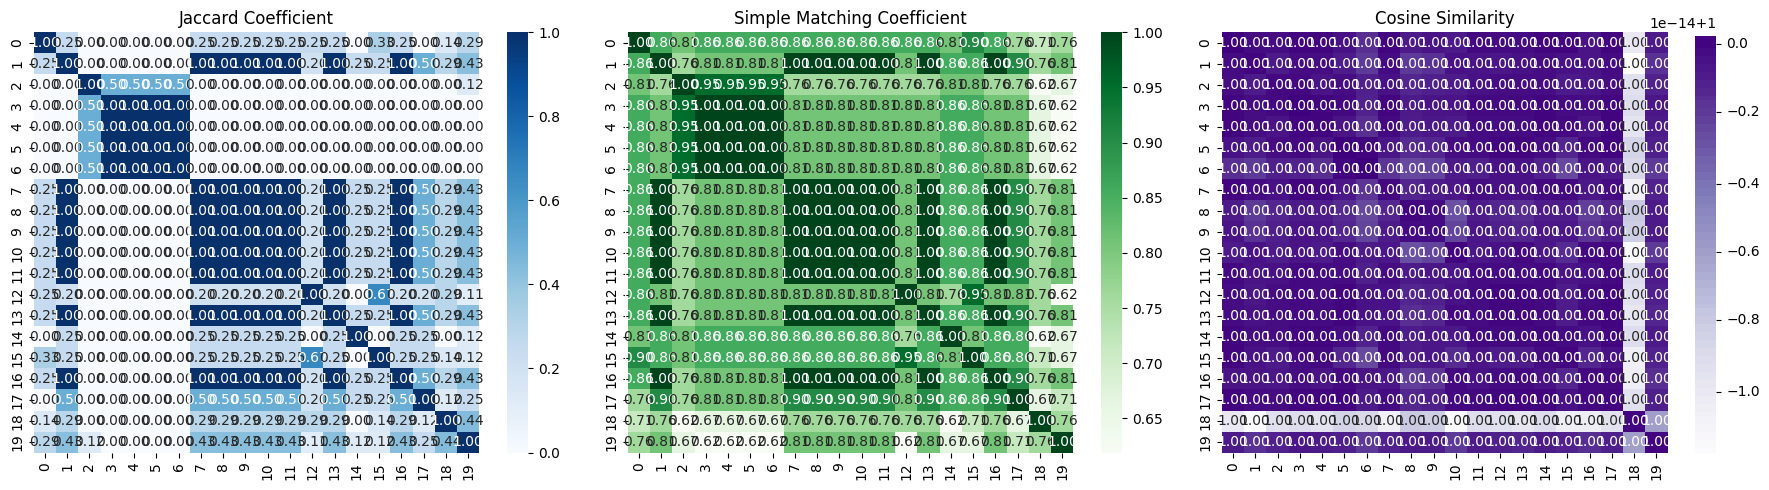

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Loading the Excel file
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name="thyroid0387_UCI")

#  Cleans and preprocess
df.replace('?', np.nan, inplace=True)
df.replace({'t': 1, 'f': 0}, inplace=True)
df.dropna(axis=1, how='all', inplace=True)

#  Encodes categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Fills missing values
for col in df_encoded.columns:
    if df_encoded[col].dtype in ['float64', 'int64']:
        df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mean())
    else:
        df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])

#  Selects first 20 rows
df_20 = df_encoded.iloc[:20]

# Identifyes binary columns
binary_cols = [col for col in df_20.columns if df_20[col].dropna().isin([0, 1]).all()]

#  Initializes similarity matrices
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = cosine_similarity(df_20.values)

#  Computes JC and SMC matrices
for i in range(20):
    for j in range(20):
        v1 = df_20.iloc[i][binary_cols].astype(int).values
        v2 = df_20.iloc[j][binary_cols].astype(int).values
        f11 = sum((v1 == 1) & (v2 == 1))
        f00 = sum((v1 == 0) & (v2 == 0))
        f01 = sum((v1 == 0) & (v2 == 1))
        f10 = sum((v1 == 1) & (v2 == 0))
        denom_jc = f11 + f01 + f10
        denom_smc = f11 + f00 + f01 + f10
        jc_matrix[i][j] = f11 / denom_jc if denom_jc != 0 else np.nan
        smc_matrix[i][j] = (f11 + f00) / denom_smc if denom_smc != 0 else np.nan

#  Plots heatmaps
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Jaccard Coefficient")

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Simple Matching Coefficient")

plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title("Cosine Similarity")

plt.tight_layout()
plt.show()


**A8**

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from google.colab import files
import pandas as pd

#  Uploading the file
uploaded = files.upload()

# Loading the Marketing Campaign sheet
df = pd.read_excel('Lab Session Data.xlsx', sheet_name="marketing_campaign")


# Replacing '?' with NaN
df.replace('?', np.nan, inplace=True)

# Encoding categorical columns (Education, Marital_Status, etc.)
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Imputing missing values based on central tendency rules
for col in df_encoded.columns:
    if df_encoded[col].isnull().sum() == 0:
        continue

    if df_encoded[col].dtype in ['float64', 'int64']:
        # Checking for outliers using z-score
        col_zscore = zscore(df_encoded[col].dropna())
        has_outliers = np.any(np.abs(col_zscore) > 3)

        if has_outliers:
            # Using median if outliers are present
            median_val = df_encoded[col].median()
            df_encoded[col] = df_encoded[col].fillna(median_val)
            print(f"{col}: filled with median ({median_val}) due to outliers")
        else:
            # Using mean if no outliers
            mean_val = df_encoded[col].mean()
            df_encoded[col] = df_encoded[col].fillna(mean_val)
            print(f"{col}: filled with mean ({mean_val})")
    else:
        # Using mode for categorical
        mode_val = df_encoded[col].mode()[0]
        df_encoded[col] = df_encoded[col].fillna(mode_val)
        print(f"{col}: filled with mode ({mode_val})")

#  Previews the cleaned dataset
print("\nMissing values after imputation:")
print(df_encoded.isnull().sum())


Saving Lab Session Data.xlsx to Lab Session Data (1).xlsx
Income: filled with median (51381.5) due to outliers

Missing values after imputation:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


**A9**

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from google.colab import files
import pandas as pd

# Uploading the file
uploaded = files.upload()

# Loading the Marketing Campaign sheet
df = pd.read_excel('Lab Session Data.xlsx', sheet_name="marketing_campaign")

#  Loading the dataset
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name="marketing_campaign")

#  Replacing missing values
df.replace('?', pd.NA, inplace=True)
df['Income'] = df['Income'].astype(float)
df['Income'].fillna(df['Income'].median(), inplace=True)

# Identifyes numeric columns for scaling
numeric_cols = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                'NumDealsPurchases', 'NumWebPurchases']

# Applies Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df_minmax[numeric_cols])

# Applying Standardization
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = standard_scaler.fit_transform(df_standard[numeric_cols])

# Previews the results
print("Min-Max Scaled Data:")
print(df_minmax[numeric_cols].head())

print("\nStandardized Data:")
print(df_standard[numeric_cols].head())


Saving Lab Session Data.xlsx to Lab Session Data (2).xlsx
Min-Max Scaled Data:
     Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.084832  0.585859  0.425318   0.442211         0.316522         0.664093   
1  0.067095  0.383838  0.007368   0.005025         0.003478         0.007722   
2  0.105097  0.262626  0.285332   0.246231         0.073623         0.428571   
3  0.037471  0.262626  0.007368   0.020101         0.011594         0.038610   
4  0.085065  0.949495  0.115874   0.216080         0.068406         0.177606   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  
0          0.334601      0.243094           0.200000         0.296296  
1          0.003802      0.016575           0.133333         0.037037  
2          0.079848      0.116022           0.066667         0.296296  
3          0.011407      0.013812           0.133333         0.074074  
4          0.102662      0.041436           0.333333         0.185185  

Standar

/tmp/ipython-input-1476115617.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)
